# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas_profiling import ProfileReport


## imports for Python, Pandas

In [2]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [3]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [4]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [5]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [6]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [7]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

# 1 Solving question number 1 in two ways

In [8]:
# First way to solve 

In [9]:
# Import necessay packages
import numpy as np
import pandas as pd
import json
from pandas.io.json import json_normalize

In [10]:
# Step 1 creating dataframe named df_wb from jason files
df_wb=pd.read_json('data/world_bank_projects.json')

In [11]:
# Step 2 have a look of dataframe df_wb
df_wb.head()

,sector,supplementprojectflg,projectfinancialtype,prodline,mjtheme,idacommamt,impagency,project_name,mjthemecode,closingdate,...,majorsector_percent,board_approval_month,theme_namecode,countryname,url,source,projectstatusdisplay,ibrdcommamt,sector_namecode,_id
0,"[{'Name': 'Primary education'}, {'Name': 'Seco...",N,IDA,PE,[Human development],130000000,MINISTRY OF EDUCATION,Ethiopia General Education Quality Improvement...,"8,11",2018-07-07T00:00:00Z,...,"[{'Percent': 46, 'Name': 'Education'}, {'Perce...",November,"[{'code': '65', 'name': 'Education for all'}]",Federal Democratic Republic of Ethiopia,http://www.worldbank.org/projects/P129828/ethi...,IBRD,Active,0,"[{'code': 'EP', 'name': 'Primary education'}, ...",{'$oid': '52b213b38594d8a2be17c780'}
1,[{'Name': 'Public administration- Other social...,N,OTHER,RE,"[Economic management, Social protection and ri...",0,MINISTRY OF FINANCE,TN: DTF Social Protection Reforms Support,"1,6",NaN,...,"[{'Percent': 70, 'Name': 'Public Administratio...",November,"[{'code': '24', 'name': 'Other economic manage...",Republic of Tunisia,http://www.worldbank.org/projects/P144674?lang=en,IBRD,Active,0,"[{'code': 'BS', 'name': 'Public administration...",{'$oid': '52b213b38594d8a2be17c781'}
2,[{'Name': 'Rural and Inter-Urban Roads and Hig...,Y,IDA,PE,"[Trade and integration, Public sector governan...",6060000,MINISTRY OF TRANSPORT AND COMMUNICATIONS,Tuvalu Aviation Investment Project - Additiona...,"5,2,11,6",NaN,...,"[{'Percent': 100, 'Name': 'Transportation'}]",November,"[{'code': '47', 'name': 'Regional integration'...",Tuvalu,http://www.worldbank.org/projects/P145310?lang=en,IBRD,Active,0,"[{'code': 'TI', 'name': 'Rural and Inter-Urban...",{'$oid': '52b213b38594d8a2be17c782'}
3,[{'Name': 'Other social services'}],N,OTHER,RE,"[Social dev/gender/inclusion, Social dev/gende...",0,LABOR INTENSIVE PUBLIC WORKS PROJECT PMU,Gov't and Civil Society Organization Partnership,"7,7",NaN,...,"[{'Percent': 100, 'Name': 'Health and other so...",October,"[{'code': '57', 'name': 'Participation and civ...",Republic of Yemen,http://www.worldbank.org/projects/P144665?lang=en,IBRD,Active,0,"[{'code': 'JB', 'name': 'Other social services'}]",{'$oid': '52b213b38594d8a2be17c783'}
4,[{'Name': 'General industry and trade sector'}...,N,IDA,PE,"[Trade and integration, Financial and private ...",13100000,MINISTRY OF TRADE AND INDUSTRY,Second Private Sector Competitiveness and Econ...,"5,4",2019-04-30T00:00:00Z,...,"[{'Percent': 50, 'Name': 'Industry and trade'}...",October,"[{'code': '45', 'name': 'Export development an...",Kingdom of Lesotho,http://www.worldbank.org/projects/P144933/seco...,IBRD,Active,0,"[{'code': 'YZ', 'name': 'General industry and ...",{'$oid': '52b213b38594d8a2be17c784'}


In [12]:
# Step 3 check for info of df_wb
df_wb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 50 columns):
sector                      500 non-null object
supplementprojectflg        498 non-null object
projectfinancialtype        500 non-null object
prodline                    500 non-null object
mjtheme                     491 non-null object
idacommamt                  500 non-null int64
impagency                   472 non-null object
project_name                500 non-null object
mjthemecode                 500 non-null object
closingdate                 370 non-null object
totalcommamt                500 non-null int64
id                          500 non-null object
mjsector_namecode           500 non-null object
docty                       446 non-null object
sector1                     500 non-null object
lendinginstr                495 non-null object
countrycode                 500 non-null object
sector2                     380 non-null object
totalamt                    500 n

# having a look for columbs details we can see which columbs to look for i.e. countryshortname and countryname to progress further, we will use countryname , we can see it has no null values.

In [13]:
# step 4 slicing the dataframe with columbs name "countryname" of dataframe df_wb and storing as df_cn
df_cn=df_wb[['countryname']]

In [14]:
# checking the info of df_cn
df_cn.head()

,countryname
0,Federal Democratic Republic of Ethiopia
1,Republic of Tunisia
2,Tuvalu
3,Republic of Yemen
4,Kingdom of Lesotho


In [15]:
# step 5 using a loop for counting the frequency of each countries
dict_cn={ }                                                         #creating an empty dict before looping

for index,rows in df_cn.iterrows():
    dict_cn[rows['countryname']]=dict_cn.get(rows['countryname'],0)+1

countries_with_number_of_project = sorted(dict_cn.items(), reverse = True, key=lambda r: r[1])

countries_with_top_10_projects=countries_with_number_of_project[:10]
print(countries_with_top_10_projects)


[("People's Republic of China", 19), ('Republic of Indonesia', 19), ('Socialist Republic of Vietnam', 17), ('Republic of India', 16), ('Republic of Yemen', 13), ('Kingdom of Morocco', 12), ('Nepal', 12), ("People's Republic of Bangladesh", 12), ('Republic of Mozambique', 11), ('Africa', 11)]


In [16]:
# printing the list
for i, (name, count) in enumerate(countries_with_top_10_projects):
    print(str(i+1)+' '+name+" has total "+str(count)+" projects ")

1 People's Republic of China has total 19 projects 
2 Republic of Indonesia has total 19 projects 
3 Socialist Republic of Vietnam has total 17 projects 
4 Republic of India has total 16 projects 
5 Republic of Yemen has total 13 projects 
6 Kingdom of Morocco has total 12 projects 
7 Nepal has total 12 projects 
8 People's Republic of Bangladesh has total 12 projects 
9 Republic of Mozambique has total 11 projects 
10 Africa has total 11 projects 


after carefully going through the result, it is noticed that Africa is not a country

In [17]:
countries_with_top_10_projects=countries_with_number_of_project[:11]

# printing the list
for i, (name, count) in enumerate(countries_with_top_10_projects):
    print(str(i+1)+' '+name+" has total "+str(count)+" projects ")


1 People's Republic of China has total 19 projects 
2 Republic of Indonesia has total 19 projects 
3 Socialist Republic of Vietnam has total 17 projects 
4 Republic of India has total 16 projects 
5 Republic of Yemen has total 13 projects 
6 Kingdom of Morocco has total 12 projects 
7 Nepal has total 12 projects 
8 People's Republic of Bangladesh has total 12 projects 
9 Republic of Mozambique has total 11 projects 
10 Africa has total 11 projects 
11 Burkina Faso has total 9 projects 


In [18]:
# second way to solve 

In [19]:
# count the value of diffrent countryname 
countries_count = df_wb['countryname'].value_counts()

In [20]:
countries_count.head(10)

People's Republic of China         19
Republic of Indonesia              19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
Kingdom of Morocco                 12
People's Republic of Bangladesh    12
Nepal                              12
Africa                             11
Republic of Mozambique             11
Name: countryname, dtype: int64

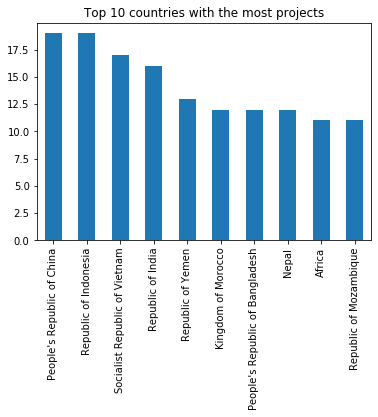

In [21]:
countries_count.head(10).plot(kind='bar',title='Top 10 countries with the most projects')
plt.show()

# 2. Find the top 10 major project themes (using column 'mjtheme_namecode')

In [22]:
# Loading the json file as string 
with open('data/world_bank_projects.json') as json_file:
    wb_str = json.load(json_file)
# normalizing to create tables on column 'mjtheme_namecode' from nested element as df_mjtheme
df_mjtheme = json_normalize(wb_str, 'mjtheme_namecode')

In [23]:
# seeing through df_mjtheme
df_mjtheme.head()

,code,name
0,8,Human development
1,11,
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration


we see empty values in name columns

In [24]:
df_mjtheme.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 2 columns):
code    1499 non-null object
name    1499 non-null object
dtypes: object(2)
memory usage: 23.5+ KB


In [25]:
#other way of checking for missing values if any.
df_mjtheme['code'].isnull().any()

False

In [26]:
df_mjtheme['name'].isnull().any()

False

In [27]:
df_mjtheme[df_mjtheme['name'] == ''].count()

code    122
name    122
dtype: int64

In [28]:
df_mjtheme[df_mjtheme['code'] == ''].count()

code    0
name    0
dtype: int64

In [29]:
df_mjtheme['code'].unique()

array(['8', '11', '1', '6', '5', '2', '7', '4', '10', '9', '3'],
      dtype=object)

In [30]:
df_mjtheme['name'].unique()

array(['Human development', '', 'Economic management',
       'Social protection and risk management', 'Trade and integration',
       'Public sector governance',
       'Environment and natural resources management',
       'Social dev/gender/inclusion',
       'Financial and private sector development', 'Rural development',
       'Urban development', 'Rule of law'], dtype=object)

we see that name colums have unique values so we will count values for code columns 

In [31]:
df_major_themes = pd.DataFrame(df_mjtheme['code'].value_counts().head(10)).reset_index()
df_major_themes.columns = ['code', 'count']
print(df_major_themes)

  code  count
0   11    250
1   10    216
2    8    210
3    2    199
4    6    168
5    4    146
6    7    130
7    5     77
8    9     50
9    1     38


In [32]:
#  a new dataframe has been created on df_mjtheme 
df_temp = df_mjtheme[df_mjtheme['name'] != ''].drop_duplicates(subset='name')
print(df_temp)

    code                                          name
0      8                             Human development
2      1                           Economic management
3      6         Social protection and risk management
4      5                         Trade and integration
5      2                      Public sector governance
6     11  Environment and natural resources management
8      7                   Social dev/gender/inclusion
11     4      Financial and private sector development
18    10                             Rural development
53     9                             Urban development
252    3                                   Rule of law


In [33]:
# Add 'name' column to the df_major_themes
df_major_themes = pd.merge(df_major_themes, df_temp, on='code')
df_major_themes[['count', 'code', 'name']]

,count,code,name
0,250,11,Environment and natural resources management
1,216,10,Rural development
2,210,8,Human development
3,199,2,Public sector governance
4,168,6,Social protection and risk management
5,146,4,Financial and private sector development
6,130,7,Social dev/gender/inclusion
7,77,5,Trade and integration
8,50,9,Urban development
9,38,1,Economic management


# 3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [34]:
df_mjtheme.head(10)

,code,name
0,8,Human development
1,11,
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration
5,2,Public sector governance
6,11,Environment and natural resources management
7,6,Social protection and risk management
8,7,Social dev/gender/inclusion
9,7,Social dev/gender/inclusion


In [35]:
df_mjtheme['code'].unique()

array(['8', '11', '1', '6', '5', '2', '7', '4', '10', '9', '3'],
      dtype=object)

In [36]:
# Sort the dataframe by code, then by name and assign to: new_df
new_df = df_mjtheme.sort_values(['code', 'name'])
new_df.head(60)

,code,name
212,1,
363,1,
1024,1,
1114,1,
1437,1,
2,1,Economic management
88,1,Economic management
175,1,Economic management
204,1,Economic management
205,1,Economic management


In [37]:
# Use a mask to replace the missing values in 'name' column
new_df['name'][new_df['name'] == ''] = np.nan
new_df.head(10)

,code,name
212,1,NaN
363,1,NaN
1024,1,NaN
1114,1,NaN
1437,1,NaN
2,1,Economic management
88,1,Economic management
175,1,Economic management
204,1,Economic management
205,1,Economic management


In [38]:
new_df = new_df.fillna(method = 'bfill')
new_df.head(60)

,code,name
212,1,Economic management
363,1,Economic management
1024,1,Economic management
1114,1,Economic management
1437,1,Economic management
2,1,Economic management
88,1,Economic management
175,1,Economic management
204,1,Economic management
205,1,Economic management
